We'll use the dataset available at https://www.kaggle.com/austinreese/craigslist-carstrucks-data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Initial data preparation

In [2]:
df = pd.read_csv('vehicles.csv')
df.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [3]:
col_names = pd.DataFrame(df.columns)
col_names

,0
0,id
1,url
2,region
3,region_url
4,price
5,year
6,manufacturer
7,model
8,condition
9,cylinders


In [4]:
df.drop(columns=['url', 'region_url', 'image_url', 'description', 'county'], inplace=True)

# Vehicles for sale by vehicles type

In [5]:
types_count = df.groupby('type')['id'].nunique()
types_count

type
SUV            77284
bus              517
convertible     7731
coupe          19204
hatchback      16598
mini-van        4825
offroad          609
other          22110
pickup         43510
sedan          87056
truck          35279
van             8548
wagon          10751
Name: id, dtype: int64

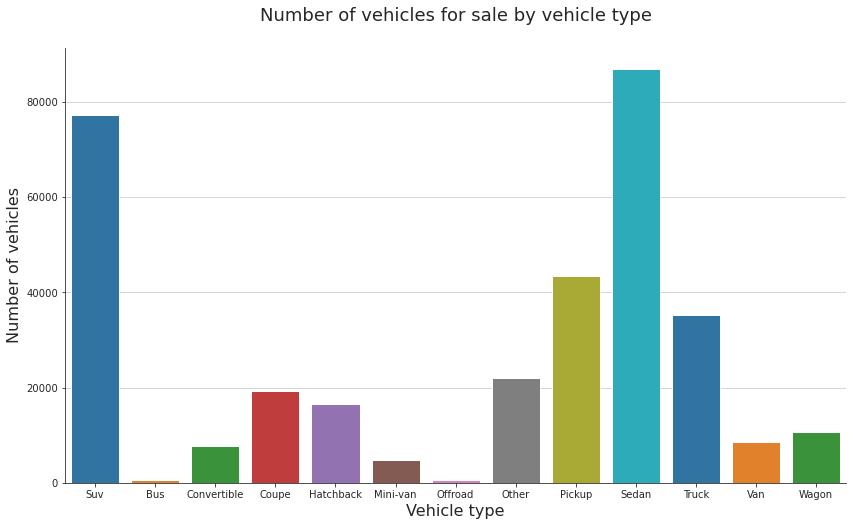

In [6]:
# Plot
indexes = [i.capitalize() for i in types_count.index]
fig = plt.figure(figsize=(14,8))

sns.set_style('ticks')
plt.grid(True)

sns.barplot(x=indexes, y=types_count.values, palette=sns.color_palette('tab10'))
sns.despine()

plt.title('Number of vehicles for sale by vehicle type\n', fontdict={'fontsize': 18})
plt.xlabel('Vehicle type', fontdict={'fontsize': 16})
plt.ylabel('Number of vehicles', fontdict={'fontsize': 16})

plt.show()

# Boxplot of vehicle types prices

Let's remove the outliers

In [7]:
q1, q3 = np.percentile(df.price, [25, 75])
iqr = q3 - q1  # Interquartile range

max_value = q3 + 1.5 * iqr
max_value

57364.375

In [8]:
# Filter the prices that are smaller than the max_value
# This way, we remove the high outliers

plot_df = df[df.price <= max_value].dropna(subset=['type'])
plot_df['type'] = plot_df.type.str.capitalize()
plot_df.head(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,transmission,VIN,drive,size,type,paint_color,state,lat,long,posting_date
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,...,other,3GTP1VEC4EG551563,NaN,NaN,Pickup,white,al,32.590,-85.4800,2021-05-04T12:31:18-0500
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,...,other,1GCSCSE06AZ123805,NaN,NaN,Pickup,blue,al,32.590,-85.4800,2021-05-04T12:31:08-0500
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,...,other,3GCPWCED5LG130317,NaN,NaN,Pickup,red,al,32.590,-85.4800,2021-05-04T12:31:25-0500
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,...,other,5TFRM5F17HX120972,NaN,NaN,Pickup,red,al,32.590,-85.4800,2021-05-04T10:41:31-0500
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,...,automatic,NaN,rwd,full-size,Truck,black,al,32.592,-85.5189,2021-05-03T14:02:03-0500


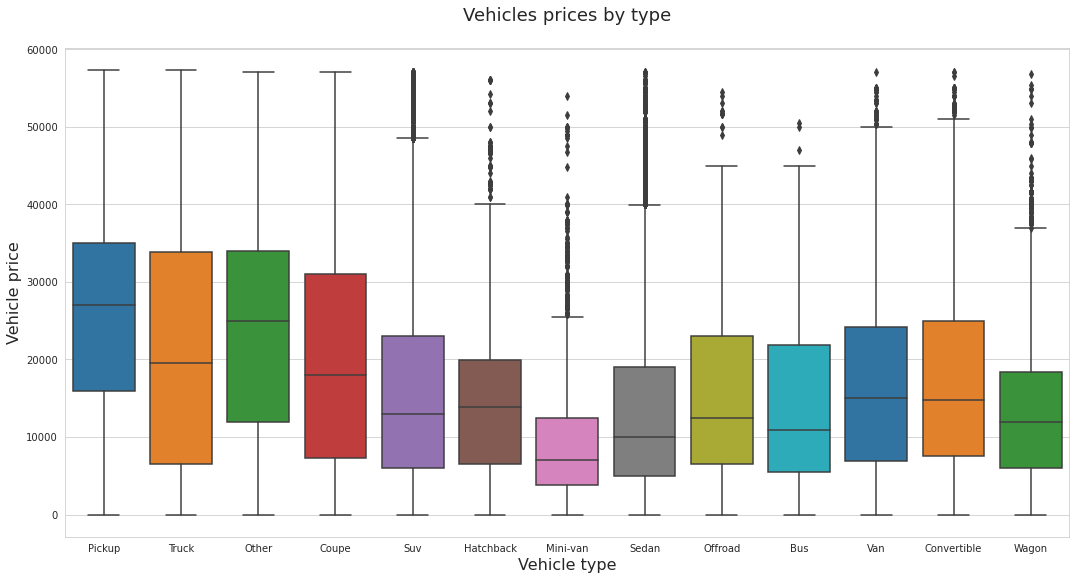

In [9]:
# Plot
plt.figure(figsize=(18, 9))

sns.set_style('whitegrid')
sns.boxplot(x='type', y='price', data=plot_df, palette=sns.color_palette('tab10'))

plt.title('Vehicles prices by type\n', fontdict={'fontsize': 18})
plt.xlabel('Vehicle type', fontdict={'fontsize': 16})
plt.ylabel('Vehicle price', fontdict={'fontsize': 16})

plt.show()

# Vehicle distribution by year

<Figure size 1152x576 with 0 Axes>

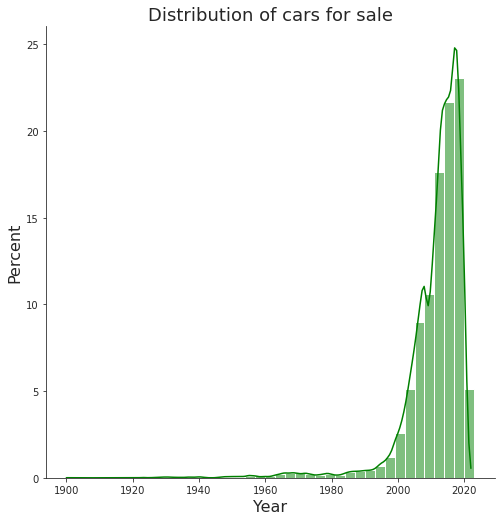

In [10]:
# Plot
plt.figure(figsize=(16, 8))

sns.set_style('ticks')
sns.displot(df, x='year', binwidth=3, height=7, stat='percent', color='green', kde=True)

plt.title('Distribution of cars for sale', fontdict={'fontsize': 18})
plt.xlabel('Year', fontdict={'fontsize': 16})
plt.ylabel('Percent', fontdict={'fontsize': 16})

plt.show()